In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from units import *
import matplotlib

gomberg et al 2016 outline equations for a rectangular buried dipslip fault

constants

In [3]:
pi = math.pi
c = (3 * pi)/16

for everymoment, calculate T for min and max stressdrop, V and Wmax

In [4]:
def calc_K_u(stressdrop, V):
    return c * stressdrop * V**3
def calc_K_b(w_max, stressdrop, V):
    return c * (w_max**2) * stressdrop * V

In [5]:
def calc_T_u(moment, stressdrop, V):
    return (moment/calc_K_u(stressdrop, V))**(1/3)
def calc_T_b(moment, stressdrop, V, w_max):
    return (moment/calc_K_b(w_max, stressdrop, V)) 

In [6]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

In [7]:
list_moments = np.logspace(9, 23, 15)

In [8]:
min_u, max_u, min_b, max_b = [],[],[],[]
for moment in list_moments:
    options_u = []
    options_b = [] 
    options_u.append(calc_T_u(moment, min_stressdrop, min_V))
    options_u.append(calc_T_u(moment, min_stressdrop, max_V))
    options_u.append(calc_T_u(moment, max_stressdrop, min_V))
    options_u.append(calc_T_u(moment, max_stressdrop, max_V))
    options_b.append(calc_T_b(moment, min_stressdrop, min_V, min_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, min_V, max_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, max_V, min_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, max_V, max_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, min_V, min_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, min_V, max_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, max_V, min_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, max_V, max_Wmax))
    min_u.append(min(options_u))
    max_u.append(max(options_u))
    min_b.append(min(options_b))
    max_b.append(max(options_b))

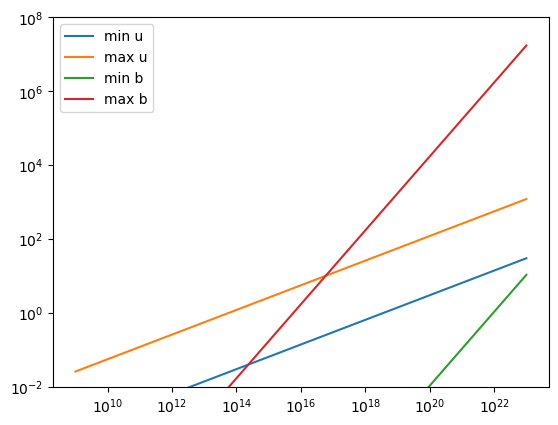

In [9]:
plt.plot(list_moments,min_u, label = 'min u')
plt.plot(list_moments,max_u, label = 'max u')
plt.plot(list_moments,min_b, label = 'min b')
plt.plot(list_moments,max_b, label = 'max b')
plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-2,1E8])
plt.legend()

In [13]:
def calc_line_fig1(V, stressdrop, w_max, list_of_moments):
    logT = []
    for moment in list_moments:
        if moment < c*stressdrop*w_max**3:
            logT.append(1/3*np.log10(moment)-1/3*np.log10(c*stressdrop*V**3))
        else:
            logT.append(np.log10(moment)-np.log10(c*stressdrop*(w_max**2)*V))
    return np.array(logT)

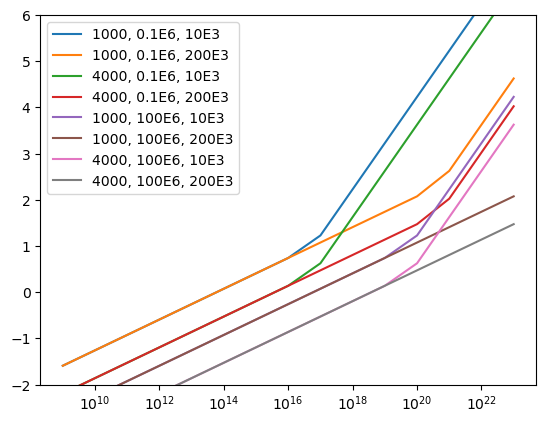

In [10]:
plt.plot(list_moments, calc_line_fig1(1000, 0.1E6, 10E3, list_moments),  label = '1000, 0.1E6, 10E3')
plt.plot(list_moments, calc_line_fig1(1000, 0.1E6, 200E3, list_moments),  label = '1000, 0.1E6, 200E3')
plt.plot(list_moments, calc_line_fig1(4000, 0.1E6, 10E3, list_moments),  label = '4000, 0.1E6, 10E3')
plt.plot(list_moments, calc_line_fig1(4000, 0.1E6, 200E3, list_moments),  label = '4000, 0.1E6, 200E3')
plt.plot(list_moments, calc_line_fig1(1000, 100E6, 10E3, list_moments),  label = '1000, 100E6, 10E3')
plt.plot(list_moments, calc_line_fig1(1000, 100E6, 200E3, list_moments),  label = '1000, 100E6, 200E3')
plt.plot(list_moments, calc_line_fig1(4000, 100E6, 10E3, list_moments),  label = '4000, 100E6, 10E3')
plt.plot(list_moments, calc_line_fig1(4000, 100E6, 200E3, list_moments),  label = '4000, 100E6, 200E3')
plt.xscale('log')
plt.ylim([-2,6])
plt.legend()

v shifts line up and down

In [10]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

In [11]:
min_logT = np.minimum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))

max_logT = np.maximum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))


NameError: name 'calc_line_fig1' is not defined

In [12]:
min_stressdrop = 1*mpa #mpa
max_stressdrop = 10*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

In [14]:
min_logT_2 = np.minimum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))

max_logT_2 = np.maximum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))


In [15]:
list_mags = (2/3)*(np.log10(list_moments)-9.1) #shearer 9.73

In [16]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

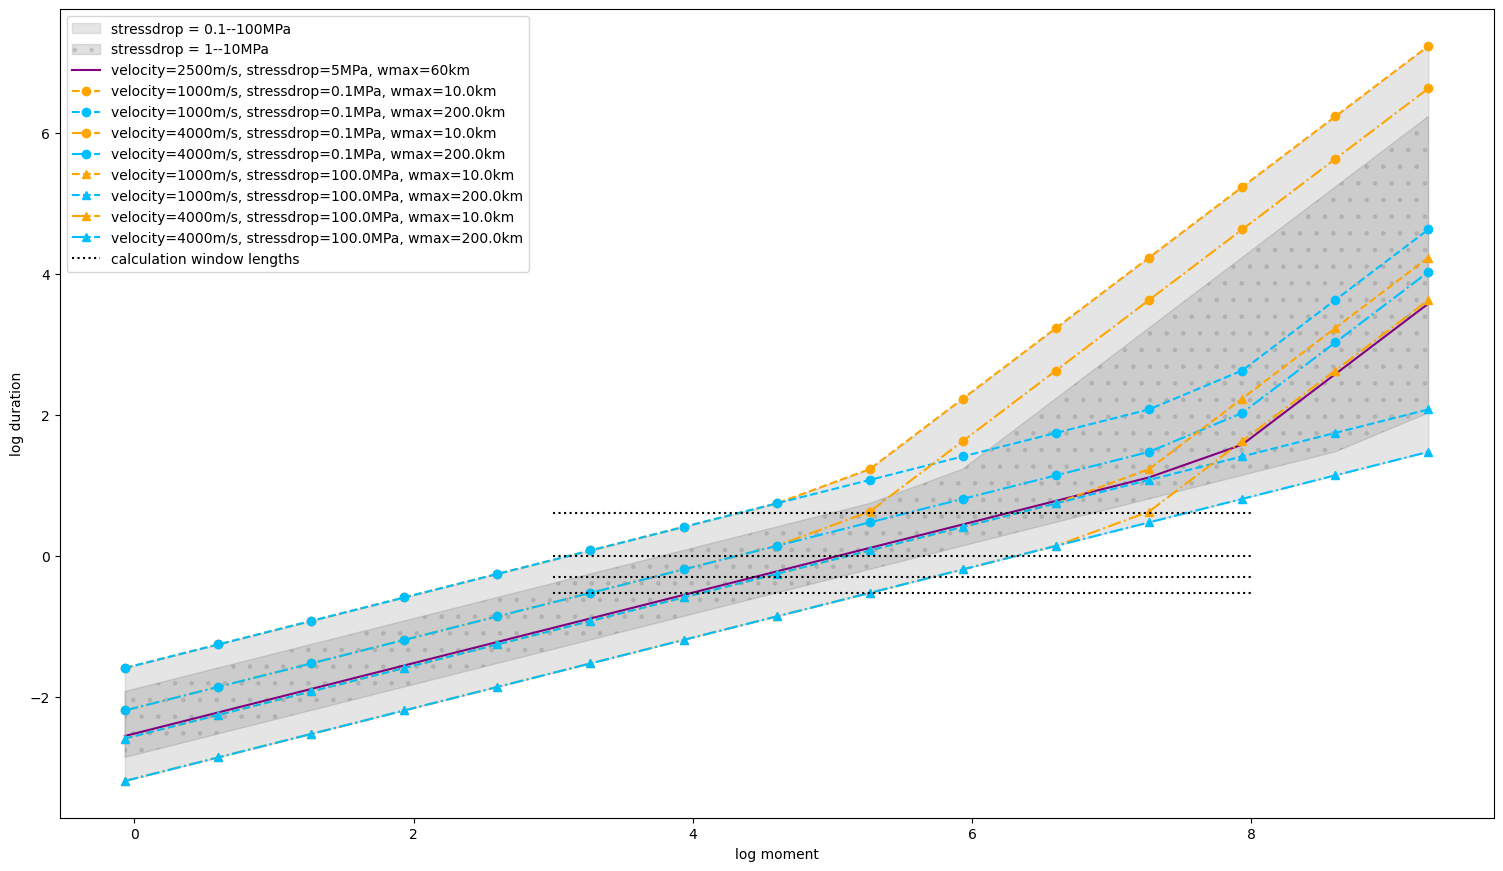

In [23]:
plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
plt.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.2, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
#plt.plot(list_mags,max_logT)
plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='orange',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='deepskyblue', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='orange', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='deepskyblue', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='orange', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='deepskyblue', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='orange', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='deepskyblue', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1])
plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/duration_estimates.pdf')

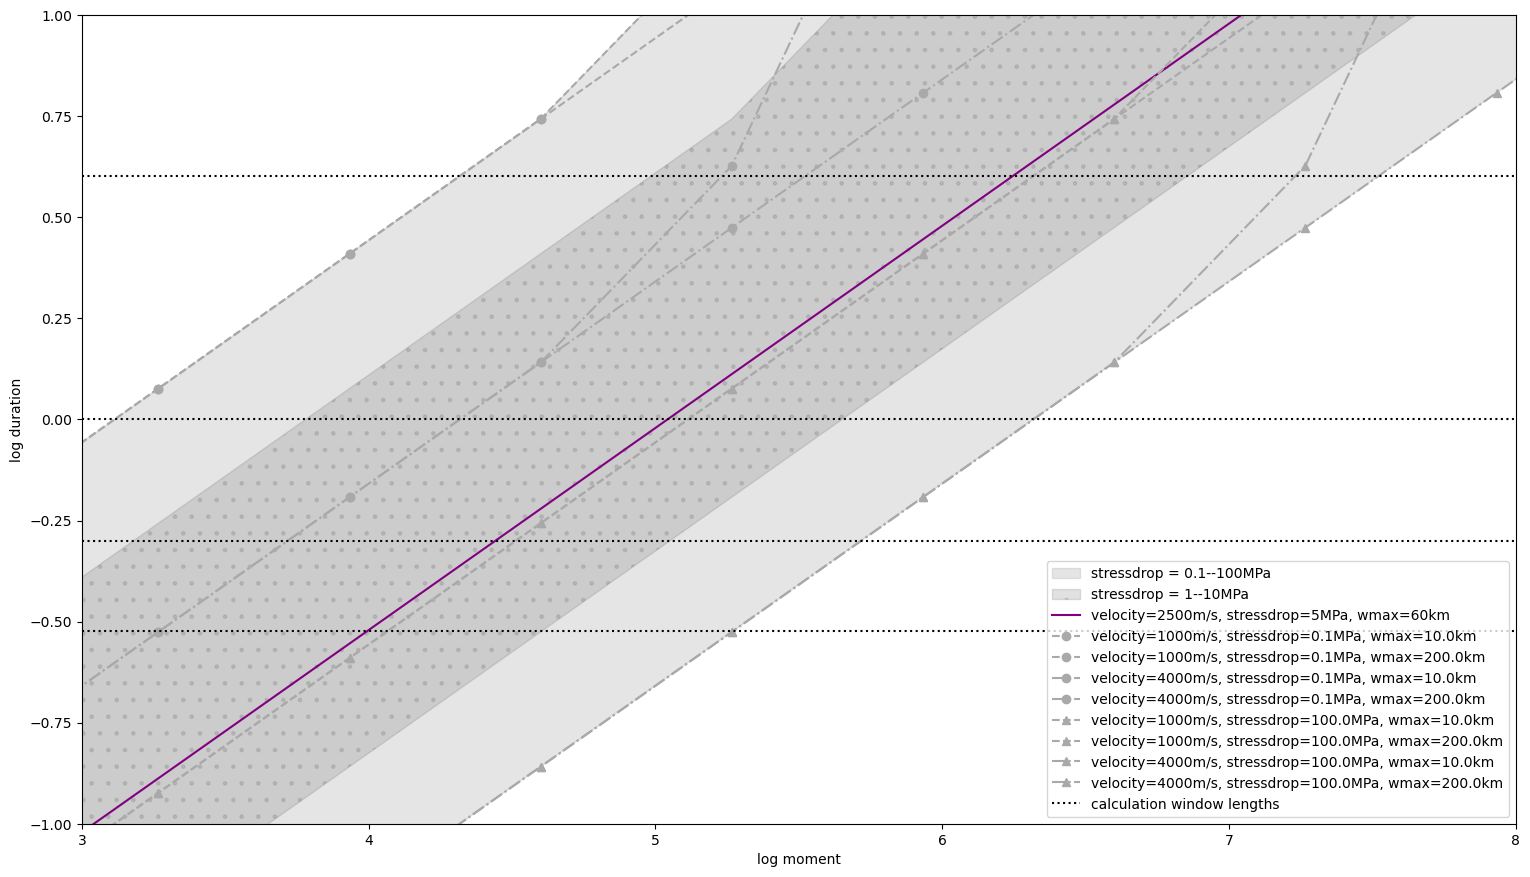

In [18]:
plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
plt.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.2, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
#plt.plot(list_mags,max_logT)
plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='darkgrey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1])
plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/ppt_duration_estimates.png')

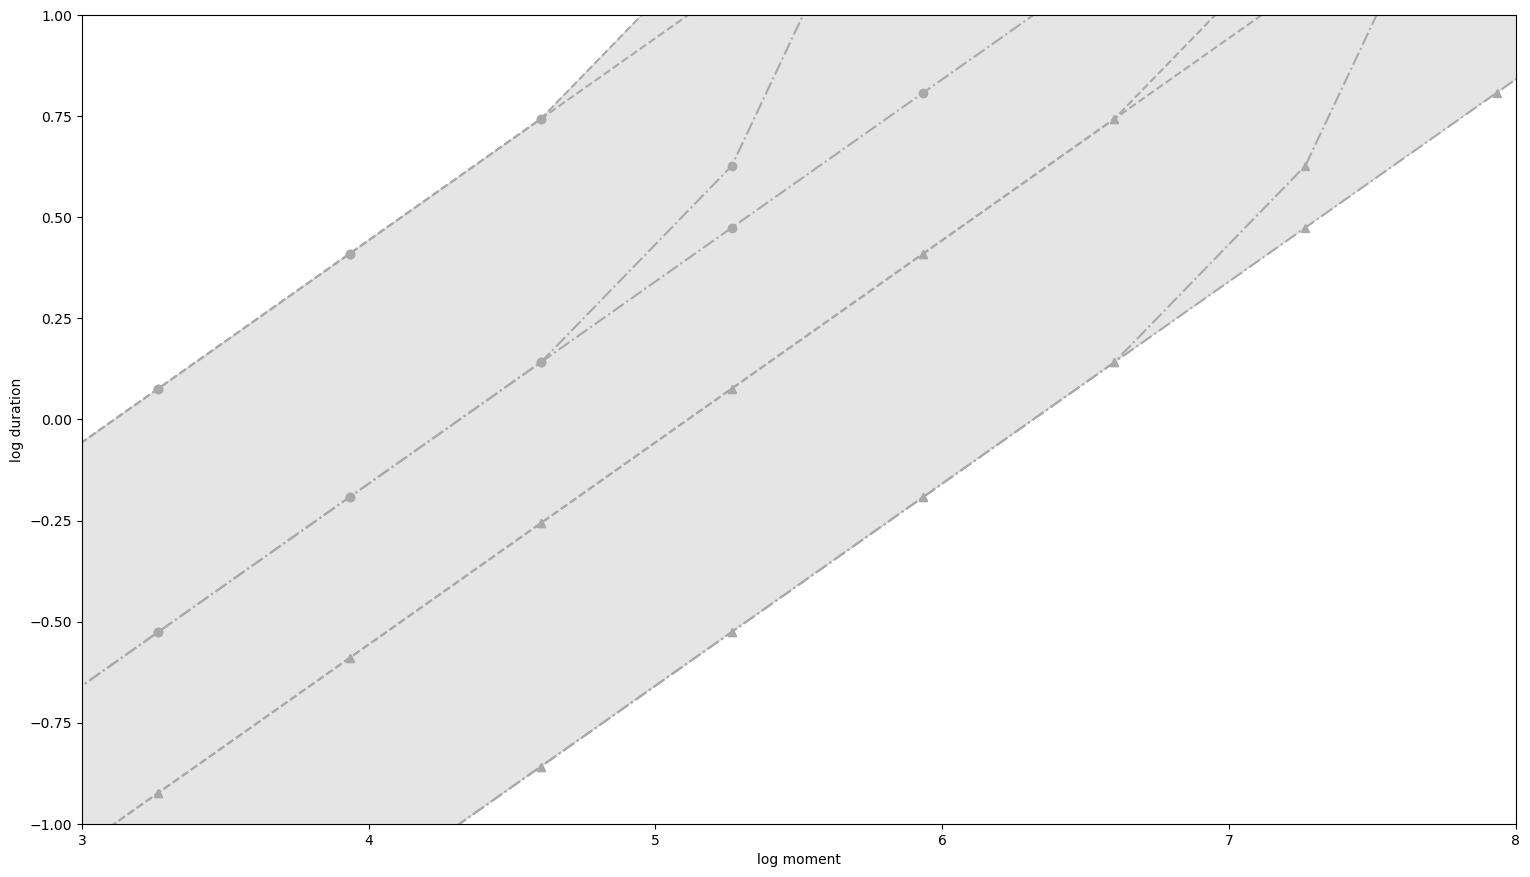

In [19]:
plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
#plt.plot(list_mags,max_logT)
#plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='darkgrey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1])
#plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
#plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
#plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/ppt_duration_estimates1.png')

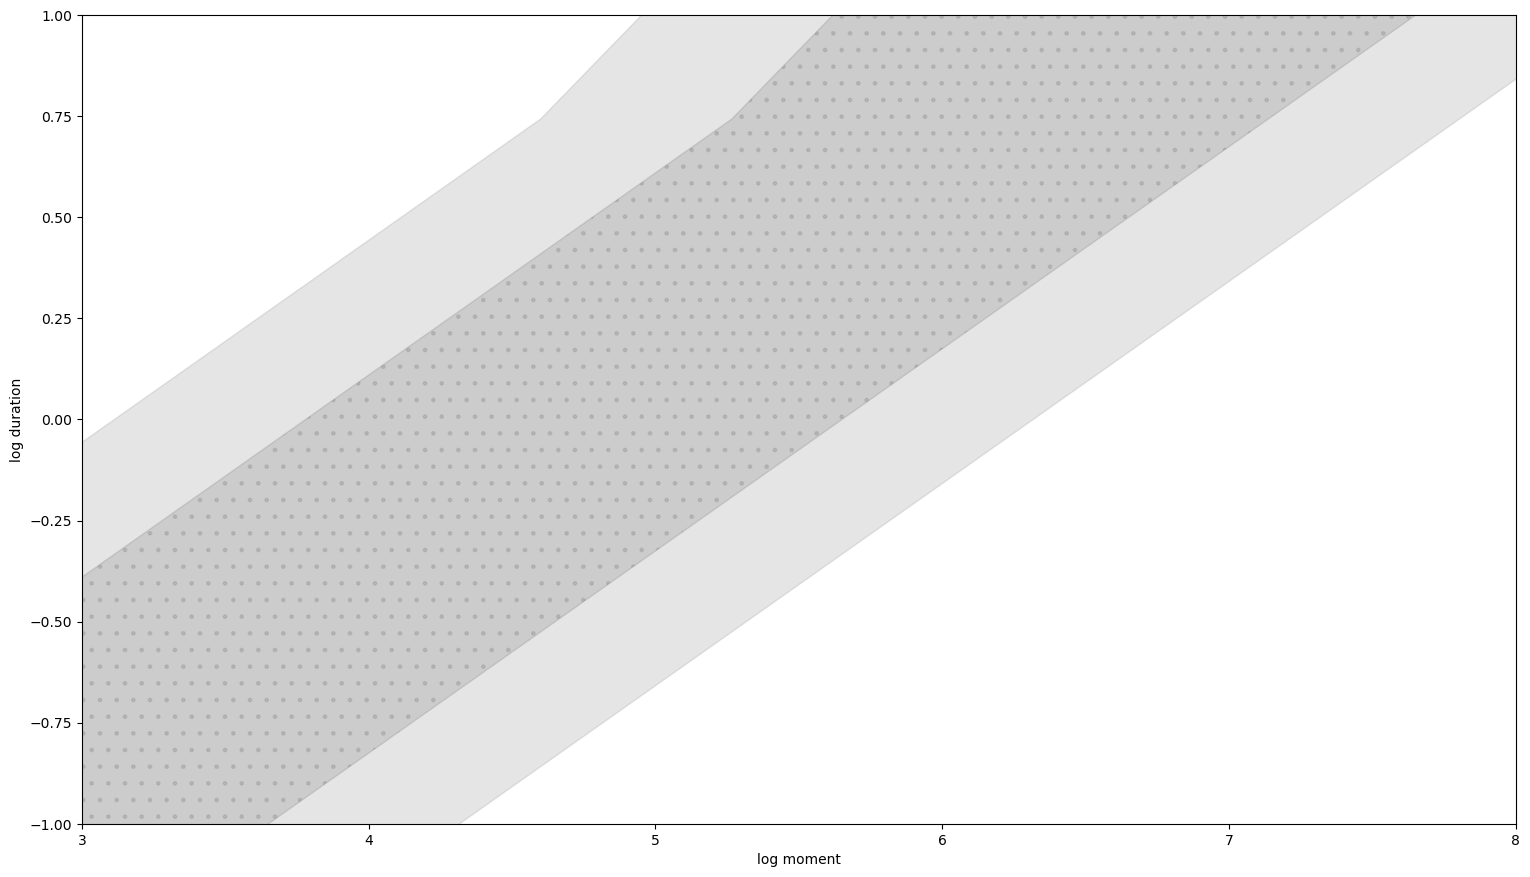

In [20]:
plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
plt.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.2, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
#plt.plot(list_mags,max_logT)
#plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='darkgrey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1])
#plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
#plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
#plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/ppt_duration_estimates2.png')

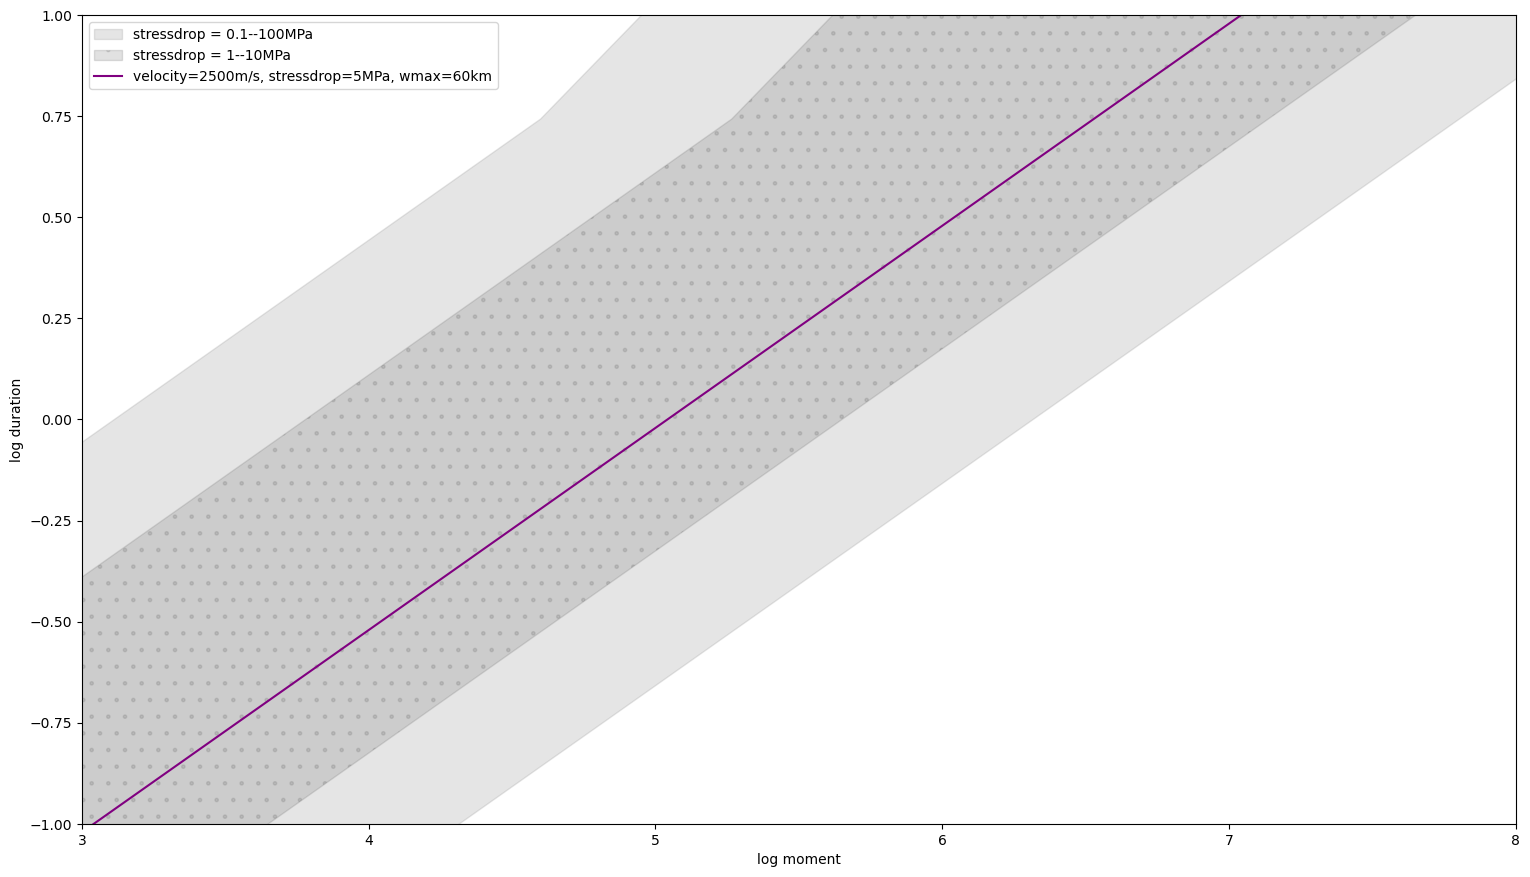

In [21]:
plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
plt.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.2, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
#plt.plot(list_mags,max_logT)
plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='darkgrey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1])
#plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
#plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
#plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/ppt_duration_estimates3.png')

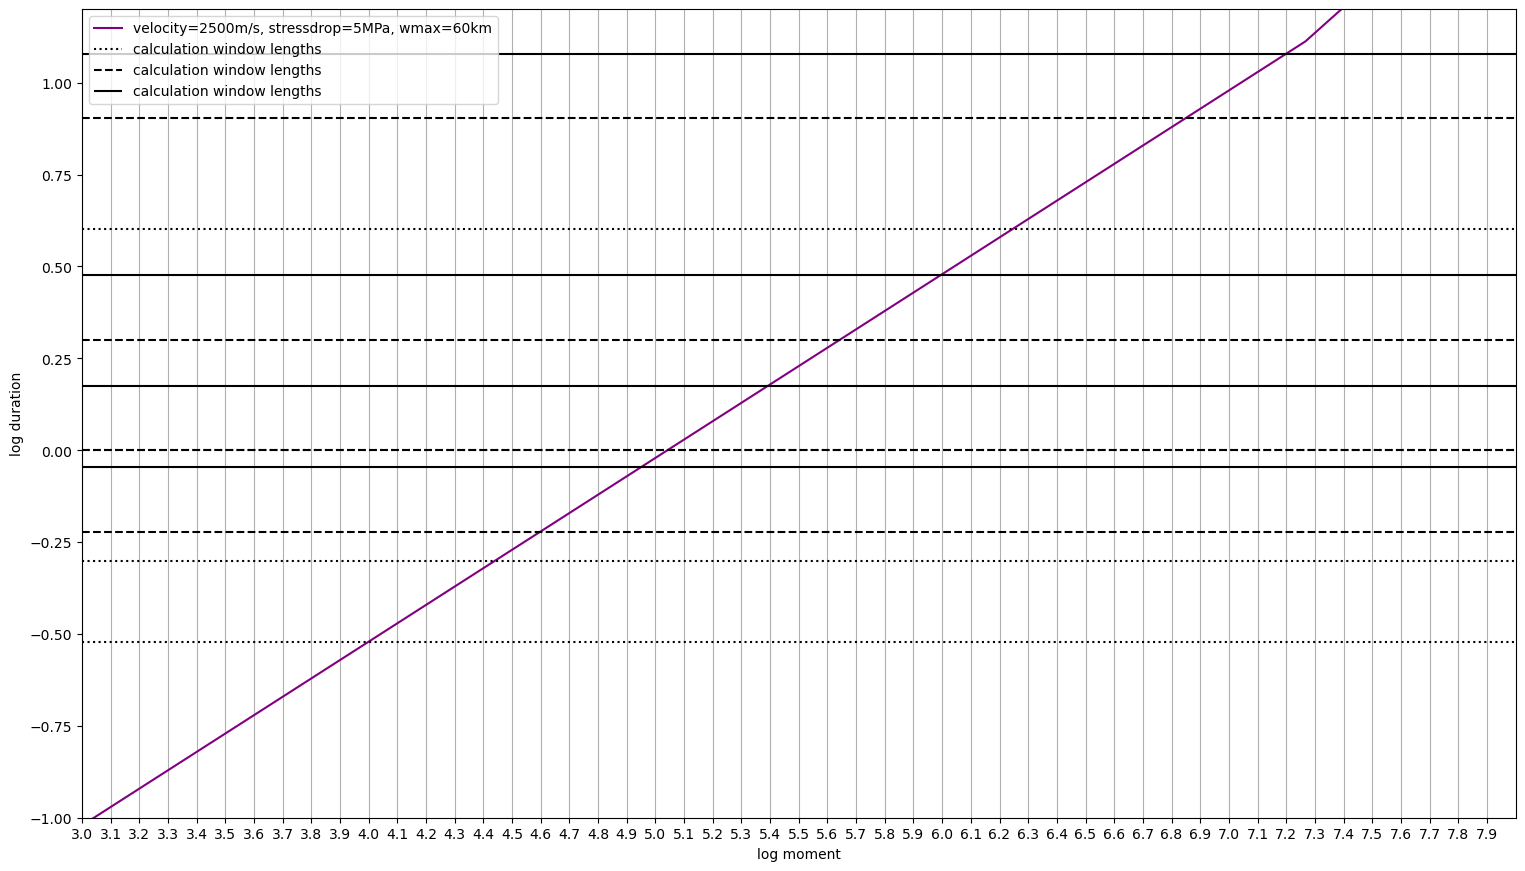

In [36]:
#plt.fill_between(list_mags,min_logT, max_logT, alpha = 0.2, color = 'grey', label='stressdrop = 0.1--100MPa')
#plt.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.2, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
#plt.plot(list_mags,max_logT)
plt.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='purple', label = f'velocity={2500}m/s, stressdrop={5}MPa, wmax={60}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), '--o', color='darkgrey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments), '--o', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments), '-.o', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments), '--^', color='darkgrey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={min_Wmax/km}km')
#plt.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments), '-.^', color='darkgrey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa, wmax={max_Wmax/km}km')

#plt.xscale('log')
plt.ylabel('log duration')
plt.xlabel('log moment')
plt.xlim([3,8])
plt.ylim([-1,1.2])
plt.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
plt.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
plt.hlines(np.log10(2), 3,8, color='k', linestyle = 'dashed', label = 'calculation window lengths')
plt.hlines(np.log10(1), 3,8, color='k', linestyle = 'dashed')
plt.hlines(np.log10(8), 3,8, color='k', linestyle = 'dashed')
plt.hlines(np.log10(0.6), 3,8, color='k', linestyle = 'dashed')
#plt.hlines(np.log10(10), 3,8, color='k',  label = 'calculation window lengths')
#plt.hlines(np.log10(5), 3,8, color='k',)
#plt.hlines(np.log10(40), 3,8, color='k')
#plt.hlines(np.log10(3), 3,8, color='k')
plt.hlines(np.log10(3), 3,8, color='k',  label = 'calculation window lengths')
plt.hlines(np.log10(1.5), 3,8, color='k',)
plt.hlines(np.log10(12), 3,8, color='k')
plt.hlines(np.log10(0.9), 3,8, color='k')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.grid(visible=True, which='major', axis='x')
plt.xticks(np.arange(3,8,0.1))
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/ppt_duration_estimates_full_half_tenth.pdf')